# Машинное обучение
# Лабораторная работа №1
## Выполнил студент группы 15-В-2
### Лютиков Д. А.
### Вариант №2

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('flights.csv', nrows = 4000000)

In [31]:
df.shape

(4000000, 31)

In [32]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3999995,2015,9,6,7,NK,410,N613NK,FLL,BWI,705,...,921.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3999996,2015,9,6,7,NK,824,N510NK,ATL,BWI,705,...,840.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3999997,2015,9,6,7,OO,2979,N906SW,TUS,PHX,705,...,758.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3999998,2015,9,6,7,OO,4702,N910EV,MLI,MSP,705,...,842.0,20.0,0,0,NaN,20.0,0.0,0.0,0.0,0.0
3999999,2015,9,6,7,OO,4719,N461SW,ATW,MSP,705,...,822.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,4000000.0,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,3.929770e+06,3.929770e+06,3.927532e+06,3.927532e+06,...,4.000000e+06,3.925040e+06,3.915583e+06,4.000000e+06,4.000000e+06,787025.000000,787025.000000,787025.000000,787025.000000,787025.000000
mean,2015.0,4.683164e+00,1.545468e+01,3.939039e+00,2.189040e+03,1.330293e+03,1.337108e+03,1.036403e+01,1.614328e+01,1.358961e+03,...,1.494661e+03,1.475464e+03,5.765280e+00,2.831500e-03,1.827275e-02,13.511395,0.068101,18.741303,23.851443,3.023129
std,0.0,2.341602e+00,8.870692e+00,1.981925e+00,1.768798e+03,4.844216e+02,4.983471e+02,3.796988e+01,9.183107e+00,5.001160e+02,...,5.075062e+02,5.296161e+02,4.014625e+01,5.313646e-02,1.339360e-01,27.887956,1.951907,47.068152,43.000940,20.253058
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.800000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,3.000000e+00,8.000000e+00,2.000000e+00,7.330000e+02,9.160000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.057000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,5.000000e+00,1.500000e+01,4.000000e+00,1.681000e+03,1.325000e+03,1.331000e+03,-1.000000e+00,1.400000e+01,1.344000e+03,...,1.520000e+03,1.512000e+03,-4.000000e+00,0.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,7.000000e+00,2.300000e+01,6.000000e+00,3.316000e+03,1.731000e+03,1.742000e+03,9.000000e+00,1.900000e+01,1.756000e+03,...,1.920000e+03,1.918000e+03,9.000000e+00,0.000000e+00,0.000000e+00,18.000000,0.000000,19.000000,30.000000,0.000000
max,2015.0,9.000000e+00,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1134.000000,256.000000,1971.000000,1331.000000,1152.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

#  1. Подсчитайте количество отменённых рейсов.



In [8]:
print(len(df[df['CANCELLED'] == 1]))

73091


# 2. Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [9]:
df1 = df.groupby('ORIGIN_AIRPORT')['CANCELLED'].sum().sort_values() 
print("Наиболее часто рейсы отменяют в аэропорте " + str(df1.index[len(df1)-1]))

Наиболее часто рейсы отменяют в аэропорте ORD


# 3. Определите корреляцию между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом.

In [45]:
from sklearn.preprocessing import LabelEncoder 

lb_make = LabelEncoder() 
df["AIRLINE"] = lb_make.fit_transform(df["AIRLINE"]) 
df["ORIGIN_AIRPORT"] = lb_make.fit_transform(df["ORIGIN_AIRPORT"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 6 columns):
CANCELLED         float64
MONTH             float64
DAY               float64
DAY_OF_WEEK       float64
AIRLINE           int64
ORIGIN_AIRPORT    int64
dtypes: float64(4), int64(2)
memory usage: 183.1 MB
                CANCELLED     MONTH       DAY  DAY_OF_WEEK   AIRLINE  \
CANCELLED        1.000000 -0.061495 -0.014845    -0.027327  0.001519   
MONTH           -0.061495  1.000000 -0.031906    -0.001592 -0.057984   
DAY             -0.014845 -0.031906  1.000000     0.004380  0.002221   
DAY_OF_WEEK     -0.027327 -0.001592  0.004380     1.000000 -0.008376   
AIRLINE          0.001519 -0.057984  0.002221    -0.008376  1.000000   
ORIGIN_AIRPORT  -0.008917 -0.000027 -0.000457     0.004462  0.066826   

                ORIGIN_AIRPORT  
CANCELLED            -0.008917  
MONTH                -0.000027  
DAY                  -0.000457  
DAY_OF_WEEK           0.004462  
AIRLINE       

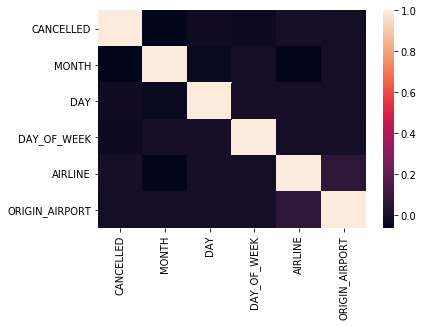

In [46]:

df['CANCELLED'] = df['CANCELLED'].astype('float')
df['MONTH'] = df['MONTH'].astype('float')
df['DAY'] = df['DAY'].astype('float')
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype('float')
df[['CANCELLED',  'MONTH','DAY' , 'DAY_OF_WEEK' , 'AIRLINE' , 'ORIGIN_AIRPORT']].info()

correlation = df[['CANCELLED',  'MONTH' , 'DAY' , 'DAY_OF_WEEK' , 'AIRLINE' , 'ORIGIN_AIRPORT']].corr(method = 'spearman')

sns.heatmap(correlation)
print(correlation)
plt.show()

In [11]:

df['MONTH'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [12]:
m1 = df[['CANCELLED', 'DAY_OF_WEEK', 'MONTH', 'AIRLINE', 'ORIGIN_AIRPORT']]
print(m1.shape)

m2 = m1.dropna()
print(m2.shape)
m2.isnull().any()


(4000000, 5)
(4000000, 5)


CANCELLED         False
DAY_OF_WEEK       False
MONTH             False
AIRLINE           False
ORIGIN_AIRPORT    False
dtype: bool

# 4. Подсчитать для каждой авиакомпании: количество рейсов,  количество отменённых рейсов, количество перенаправленных рейсов.

In [13]:
airline_list = df['AIRLINE'].unique()

print('Количество рейсов')
print(df['AIRLINE'].value_counts())

print('Отменённые рейсы')
for airline in airline_list:
    print('airline', airline, '\t', (len(df[(df['CANCELLED'] == 1) & (df['AIRLINE'] == airline)])))
          
print('Перенаправленные рейсы')    
for airline in airline_list:
    print('airline', airline, '\t', (len(df[(df['DIVERTED'] == 1) & (df['AIRLINE'] == airline)])))
    

Количество рейсов
WN    862026
DL    597683
AA    437424
OO    405231
EV    403253
UA    348888
MQ    213850
US    198715
B6    182733
AS    117881
NK     78122
F9     60315
HA     52692
VX     41187
Name: AIRLINE, dtype: int64
Отменённые рейсы
airline AS 	 479
airline AA 	 8088
airline US 	 4067
airline DL 	 3606
airline NK 	 1604
airline UA 	 5283
airline HA 	 137
airline B6 	 3906
airline OO 	 7307
airline EV 	 12228
airline MQ 	 12739
airline F9 	 438
airline WN 	 12808
airline VX 	 401
Перенаправленные рейсы
airline AS 	 294
airline AA 	 1439
airline US 	 425
airline DL 	 1390
airline NK 	 132
airline UA 	 1036
airline HA 	 48
airline B6 	 535
airline OO 	 1123
airline EV 	 1466
airline MQ 	 570
airline F9 	 120
airline WN 	 2667
airline VX 	 81


# 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для авиакомпании.

In [48]:
'''
airline_list = df['AIRLINE'].unique()

print('Скорость полета для каждого рейса')


df['speed'] = df['DISTANCE'] / (df['ARRIVAL_TIME'] - df['DEPARTURE_TIME'])
print(df['speed']) 

df['speed/sr'] = df['speed']/ 4000000
print(df['speed/sr'])
'''

print('Рейс № Скорость полета для каждого рейса') 


df['speed'] = df['DISTANCE'] / (df['ARRIVAL_TIME'] - df['DEPARTURE_TIME']) 
print(df['speed']) 
print('') 
print('Средняя скорость полета авиакомпаний') 

df['sred_speed'] = df['speed'] / df['AIRLINE'] 

print(df['sred_speed'])




Рейс № Скорость полета для каждого рейса
0          -0.744090
1           3.152909
2           2.895334
3           3.160594
4           6.161702
5           2.693220
6           2.651020
7           2.997179
8           2.853801
9           2.804173
10          2.794872
11          2.994490
12          2.692982
13          3.063584
14          2.700772
15          3.497585
16          3.447619
17          2.833622
18          3.344902
19          2.818182
20          2.692671
21          3.071026
22          2.470726
23          3.182065
24          2.932280
25          2.785859
26          3.500000
27          3.097917
28          2.975155
29          3.008803
             ...    
3999970     3.207692
3999971     8.513333
3999972     2.470085
3999973     2.551653
3999974     2.755814
3999975     3.851562
3999976     2.118280
3999977     2.880361
3999978     4.649254
3999979     5.512821
3999980     3.344633
3999981     3.241784
3999982     4.403226
3999983     6.939698
3999984     2.

# 6. Визуализировать тепловую карту частоты отмены рейсов . по одной оси – дни, по другой оси – рейс. Или что-то другое, аэропорт. Графиков будет много, для каждого аэропорта

In [18]:
Сказали , что можно не делать:)

SyntaxError: invalid syntax (<ipython-input-18-72c5f6a7befa>, line 1)

# 7. Посчитайте и визуализируйте время задержки, отправки и прибытия по каждому аэропорту.

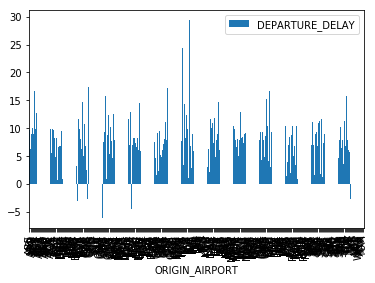

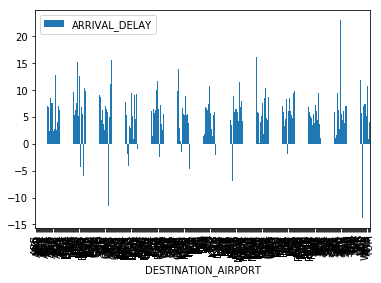

In [36]:
df.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','DEPARTURE_DELAY'].mean().dropna().plot(kind='bar') 
df.groupby('DESTINATION_AIRPORT')['DESTINATION_AIRPORT','ARRIVAL_DELAY'].mean().dropna().plot(kind='bar') 
plt.show()


# 8. Определите для каждого аэропорта и визуализируйте задержки по каждой причине.

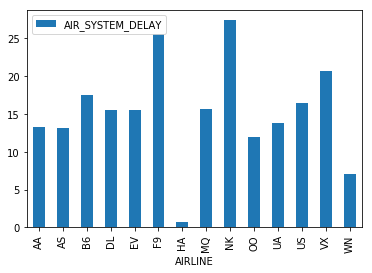

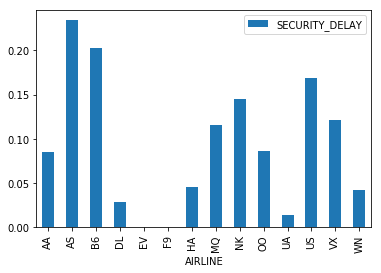

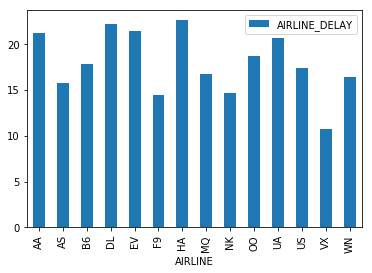

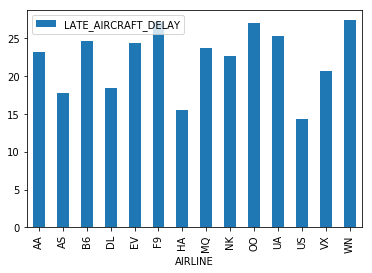

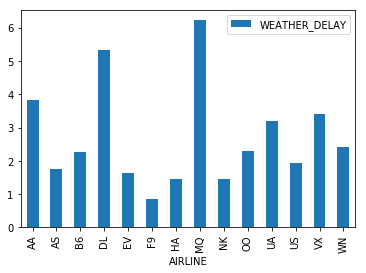

In [37]:
df_air = df['AIR_SYSTEM_DELAY']
df_sec = df['SECURITY_DELAY']
df_airl = df['AIRLINE_DELAY']
df_late = df['LATE_AIRCRAFT_DELAY']
df_weat = df['WEATHER_DELAY']            

df_air = df_air.dropna().reset_index(drop=True)
df_sec = df_sec.dropna().reset_index(drop=True)
df_airl = df_airl.dropna().reset_index(drop=True)
df_late = df_late.dropna().reset_index(drop=True)
df_weat = df_weat.dropna().reset_index(drop=True)


df.groupby('AIRLINE')['AIRLINE','AIR_SYSTEM_DELAY'].mean().dropna().plot(kind='bar') 
df.groupby('AIRLINE')['AIRLINE','SECURITY_DELAY'].mean().dropna().plot(kind='bar')
df.groupby('AIRLINE')['AIRLINE','AIRLINE_DELAY'].mean().dropna().plot(kind='bar')
df.groupby('AIRLINE')['AIRLINE','LATE_AIRCRAFT_DELAY'].mean().dropna().plot(kind='bar')    
df.groupby('AIRLINE')['AIRLINE','WEATHER_DELAY'].mean().dropna().plot(kind='bar')
plt.legend()
plt.show()


        



# 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [44]:
airline_list = df['AIRLINE'].unique()
import operator
print('Максимальные задержки рейсов по отправке')
delay_dict = {}
for airline in airline_list:
    delay = len(df[(df['DEPARTURE_DELAY'] == 1) & (df['AIRLINE'] == airline)])
    print('airline', airline, '\t', delay)
    delay_dict[airline] = delay
    
    
delay_dict = sorted(delay_dict.items(), key=operator.itemgetter(1))
print('max item: ', delay_dict[-1])

print('Максимальные задержки рейсов по прибытию')
delay_dict = {}
for airline in airline_list:
    delay = len(df[(df['ARRIVAL_DELAY'] == 1) & (df['AIRLINE'] == airline)])
    print('airline', airline, '\t', delay)
    delay_dict[airline] = delay
    
delay_dict = sorted(delay_dict.items(), key=operator.itemgetter(1))
print('max item: ', delay_dict[-1])


Максимальные задержки рейсов по отправке
airline AS 	 2986
airline AA 	 11490
airline US 	 5426
airline DL 	 18682
airline NK 	 1565
airline UA 	 13561
airline HA 	 1544
airline B6 	 3184
airline OO 	 6868
airline EV 	 7216
airline MQ 	 3474
airline F9 	 1039
airline WN 	 31114
airline VX 	 1238
max item:  ('WN', 31114)
Максимальные задержки рейсов по прибытию
airline AS 	 2880
airline AA 	 7604
airline US 	 4269
airline DL 	 10854
airline NK 	 1402
airline UA 	 6069
airline HA 	 2083
airline B6 	 2871
airline OO 	 9031
airline EV 	 8304
airline MQ 	 3543
airline F9 	 1233
airline WN 	 18121
airline VX 	 874
max item:  ('WN', 18121)
